the data used is the device used to watch the youtube channel 

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#reading the csv data
data = pd.read_csv('/home/hp/10academy/Redash-chatbot-add-on/data_used/Chart data.csv',encoding='UTF-8')
# view the 5 rows to have overview
data.head()

,Date,Device type,Views
0,2020-06-28,Computer,1
1,2020-06-29,Computer,49
2,2020-06-30,Computer,62
3,2020-07-01,Computer,46
4,2020-07-02,Computer,29


In [34]:
# the data has 3 columns Data, device type and views 
# checking the type of each columns
data.dtypes

Date           object
Device type    object
Views           int64
dtype: object

In [35]:
#changing the data type of Date to date time 
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date           datetime64[ns]
Device type            object
Views                   int64
dtype: object

In [36]:
data.isnull().sum()

Date           0
Device type    0
Views          0
dtype: int64

In [37]:
data.shape

(5116, 3)

In [38]:
used_device_to_watch = data['Device type'].unique()
used_device_to_watch

array(['Computer', 'TV', 'Mobile phone', 'Tablet'], dtype=object)

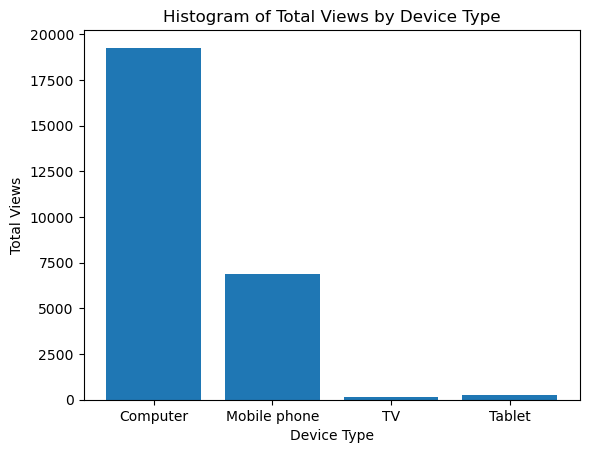

In [39]:
# drawing how much view we get from each device 

# Group by device type and calculate the total views
device_views = data.groupby('Device type')['Views'].sum()

# Plotting the histogram
plt.bar(device_views.index, device_views.values)
plt.xlabel('Device Type')
plt.ylabel('Total Views')
plt.title('Histogram of Total Views by Device Type')
plt.show()

As shown in the histogram only four devices are used to watch the youtube channel. Among them, computer is the most used device and TV is the least used. 

In [40]:
# put the data in ascending order by data, to get the overview of how the view is changing over time 
data_by_date = data.sort_values('Date')

data_by_date.head()


,Date,Device type,Views
0,2020-06-28,Computer,1
2558,2020-06-28,Mobile phone,0
1279,2020-06-28,TV,0
3837,2020-06-28,Tablet,0
3838,2020-06-29,Tablet,0


In [41]:
data_by_date.tail()

,Date,Device type,Views
1277,2023-12-27,Computer,4
2557,2023-12-28,TV,0
1278,2023-12-28,Computer,24
3836,2023-12-28,Mobile phone,1
5115,2023-12-28,Tablet,0


In [45]:
views_by_date = data_by_date.groupby('Date')['Views'].sum()
views_by_date.head()

Date
2020-06-28     1
2020-06-29    72
2020-06-30    76
2020-07-01    70
2020-07-02    57
Name: Views, dtype: int64

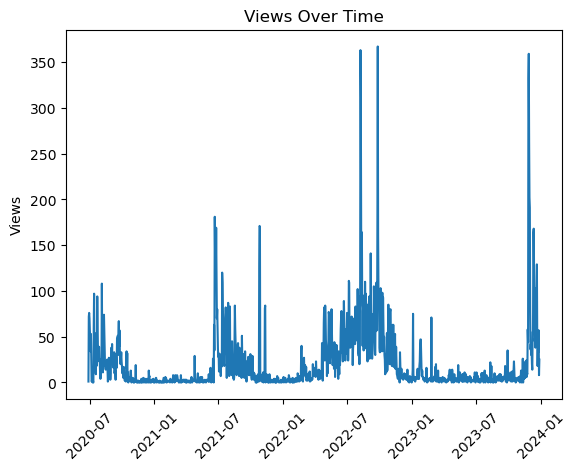

In [48]:
# drawing a graph to depict the change in views over time 

# Plotting the graph
plt.plot(views_by_date)
plt.ylabel('Views')
plt.title('Views Over Time')
plt.xticks(rotation=45)
plt.show()